In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#! unzip /content/drive/MyDrive/DL/CT.zip -d /content/data

In [ ]:
#! unzip /content/drive/MyDrive/DL/gt.zip -d /content/drive/MyDrive/DL/gt

In [ ]:
#! unzip /content/drive/MyDrive/DL/GroundTruths.zip -d /content/drive/MyDrive/DL/GroundTruths

In [ ]:
#import os

In [ ]:
# for filename in os.listdir('/content/drive/MyDrive/DL/images'):
#   print(filename)
#   if filename[-3:] == 'nii' and len(filename)>3:
#     os.rename('/content/drive/MyDrive/DL/images/'+filename, '/content/drive/MyDrive/DL/images/nii/'+filename)

Data was transfered to drive before continuing.

Top 2 lines should not be run again

In [ ]:
!pip install evalseg
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.5 MB/s eta 0:00:00
  Created wheel for tree-format: filename=tree_format-0.1.2-py3-none-any.whl size=5384 sha256=799a4a27094b166bbe827a5b8d9486e2c021658da323c4a3ed5c7f5f02ad3ba4
  Stored in directory: /root/.cache/pip/wheels/b2/16/0f/3cfb79a

In [ ]:
#!pip install skimage

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import pickle
import evalseg
import memory_profiler
import numpy as np
#import skimage
#from skimage.util import montage as montage2d
import os

# 1. Data Exploration, Extraction, and Preprocessing

In [ ]:
img = nib.load('/content/drive/MyDrive/DL/images/021.nii').get_fdata()

In [ ]:
type(img)

numpy.memmap

In [ ]:
img.shape

(512, 512, 93)

In [ ]:
img[:,:,0]

array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       ...,
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.]])

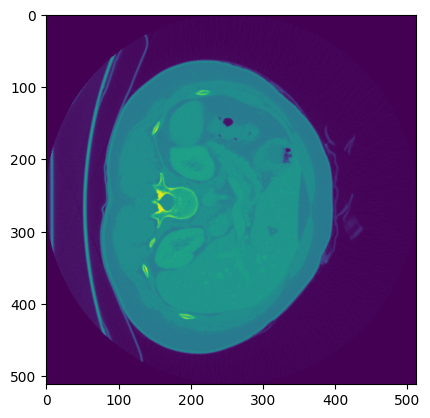

In [ ]:
plt.imshow(img[:,:,45])

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/DL/GroundTruths/pkl/021.pkl","rb") as file_handle:
    im = pickle.load(file_handle)[:,:,:]
print(im.shape)
np.unique(im)

(512, 512, 93)


array([0, 1], dtype=uint8)

In [ ]:
# import skimage
# from skimage.util import montage as montage2d
# #fig, ax1 = plt.subplots(1, 1, figsize = (1, 5))
# plt.imshow(montage2d(test2),aspect='auto')

### Histogram of varying depths of 3D patient scans

(array([ 1.,  3.,  2.,  0.,  1.,  6.,  8., 15.,  9.,  7.,  1.,  2.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  2.,  1.,
         3.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.]),
 array([ 41.   ,  47.725,  54.45 ,  61.175,  67.9  ,  74.625,  81.35 ,
         88.075,  94.8  , 101.525, 108.25 , 114.975, 121.7  , 128.425,
        135.15 , 141.875, 148.6  , 155.325, 162.05 , 168.775, 175.5  ,
        182.225, 188.95 , 195.675, 202.4  , 209.125, 215.85 , 222.575,
        229.3  , 236.025, 242.75 , 249.475, 256.2  , 262.925, 269.65 ,
        276.375, 283.1  , 289.825, 296.55 , 303.275, 310.   ]),
 <BarContainer object of 40 artists>)

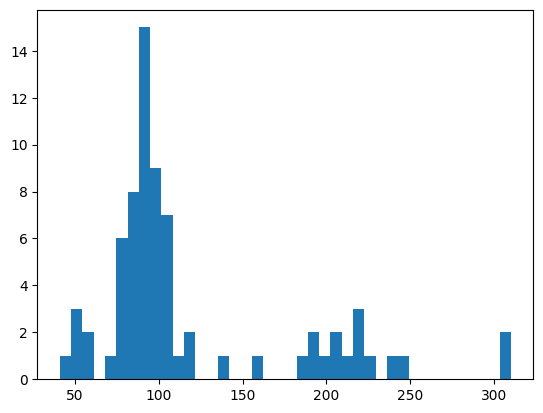

In [ ]:
depths = []
for s in scans:
  depths.append(s.shape[2])
depths.sort()
plt.hist(depths,bins=40)

## Load ID numbers of patients with ground truth values 

In [ ]:
path = '/content/drive/MyDrive/DL/gt/'
number=[]
#gt=[]
for filename in os.listdir(path):
  if filename[-3:] == 'pkl':
      number.append(filename[:3])
      #f=open(path+filename,'rb')
      #gt.append(pickle.load(f)[:,:,:])
number == sorted(number)
print(len(number))

72


## Extract images of patients with ground truth values from "images" folder and convert to jpgs for creating dataset. Also define train/test split

In [ ]:
!rm -r /content/drive/MyDrive/DL/images/train
!mkdir /content/drive/MyDrive/DL/images/train
!rm -r /content/drive/MyDrive/DL/images/test
!mkdir /content/drive/MyDrive/DL/images/test

In [ ]:
nibs=[]
for filename in os.listdir('/content/drive/MyDrive/DL/images/nii'):
      if filename[:3] in number:
        nibs.append(filename)
nibs.sort()

#train should be first 55 images, test is rest

train = nibs[:55]
test = nibs[55:]

In [ ]:
for n in train:
  #print(n)
  patient = nib.load('/content/drive/MyDrive/DL/images/'+n).get_fdata()
  #plt.imshow(patient[:,:,0])
  #print(np.min(patient))
  #print(np.max(patient))
  for slice_num in np.arange(patient.shape[2]):
    path = "/content/drive/MyDrive/DL/images/train/"+n[0:3]+'_'+str(slice_num+1).zfill(3)+'.jpg'
    plt.imsave(path, patient[:,:,slice_num])

for n in test:
  #print(n)
  patient = nib.load('/content/drive/MyDrive/DL/images/'+n).get_fdata()
  for slice_num in np.arange(patient.shape[2]):
    path = "/content/drive/MyDrive/DL/images/test/"+n[0:3]+'_'+str(slice_num+1).zfill(3)+'.jpg'
    plt.imsave(path, patient[:,:,slice_num])

#print(images)
#img=nib.load(nibs[0]).get_data()
#plt.imshow(img[:,:,7])

021.nii
024.nii
041.nii
042.nii
045.nii
051.nii
058.nii
067.nii
071.nii
075.nii
077.nii
087.nii
089.nii
092.nii
095.nii
110.nii
119.nii
138.nii
145.nii
147.nii
166.nii
169.nii
170.nii
175.nii
180.nii
186.nii
191.nii
193.nii
194.nii
213.nii
222.nii
225.nii
226.nii
235.nii
256.nii
261.nii
284.nii
286.nii
290.nii
294.nii
299.nii
305.nii
312.nii
315.nii
320.nii
336.nii
343.nii
364.nii
367.nii
370.nii
372.nii
385.nii
386.nii
398.nii
401.nii
411.nii
415.nii
422.nii
423.nii
425.nii
436.nii
441.nii
442.nii
444.nii
446.nii
466.nii
476.nii
485.nii
487.nii
490.nii
494.nii
502.nii


In [ ]:
len(nibs)

72

In [ ]:
p_num = [filename[:7] for filename in os.listdir('/content/drive/MyDrive/DL/images/gt/train')]

s_num = [filename[:7] for filename in os.listdir('/content/drive/MyDrive/DL/images/scans/train') if filename[:7] not in p_num]

s_num

['401_001',
 '401_002',
 '401_003',
 '401_004',
 '401_005',
 '401_006',
 '401_007',
 '401_008',
 '401_009',
 '401_010',
 '401_011',
 '401_012',
 '401_013',
 '401_014',
 '401_015',
 '401_016',
 '401_017',
 '401_018',
 '401_019',
 '401_020',
 '401_021',
 '401_022',
 '401_023',
 '401_024',
 '401_025',
 '401_026',
 '401_027',
 '401_028',
 '401_029',
 '401_030',
 '401_031',
 '401_032',
 '401_033',
 '401_034',
 '401_035',
 '401_036',
 '401_037',
 '401_038',
 '401_039',
 '401_040',
 '401_041',
 '401_042',
 '401_043',
 '401_044',
 '401_045',
 '401_046',
 '401_047',
 '401_048',
 '401_049',
 '401_050',
 '401_051',
 '401_052',
 '401_053',
 '401_054',
 '401_055',
 '401_056',
 '401_057',
 '401_058',
 '401_059',
 '401_060',
 '401_061',
 '401_062',
 '401_063',
 '401_064',
 '401_065',
 '401_066',
 '401_067',
 '401_068',
 '401_069',
 '401_070',
 '401_071',
 '401_072',
 '401_073',
 '401_074',
 '401_075',
 '401_076',
 '401_077',
 '401_078',
 '401_079',
 '401_080',
 '401_081',
 '401_082',
 '401_083',
 '40

# 2. Create image dataset and define dataloaders

In [1]:
#from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
import cv2

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
# patient_nums = [filename[:7] for filename in os.listdir('/content/drive/MyDrive/DL/images/train')]
# patient_nums

In [ ]:
len(list(sorted(os.listdir(os.path.join(data_dir,"scans",'train')))))

4993

In [ ]:
len(list(sorted(os.listdir(os.path.join(data_dir,"gt",'train')))))

4875

In [2]:
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, root, split, transforms=transforms.ToTensor()):
        self.root = root
        self.transforms = transforms
        self.split = split
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root,"scans",split))))
        self.imgs = self.imgs[:(len(self.imgs)//32)*32]
        print(len(self.imgs))
        self.masks = list(sorted(os.listdir(os.path.join(root,"gt",split))))
        self.masks = self.masks[:(len(self.masks)//32)*32]
        print(len(self.masks))

    def __getitem__(self, idx):
        # load images ad masks
        if(idx >= len(self.imgs)):
          print('ERROR',idx)
        img_path = os.path.join(self.root, "scans", self.split, self.imgs[idx])
        mask_path = os.path.join(self.root, "gt", self.split, self.masks[idx])
        img = Image.open(img_path)#.convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = cv2.imread(mask_path,2)
        ret,mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)

        #mask = np.array(mask)
        #print(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        #obj_ids = np.asarray(obj_ids[1:])#CONVERTS SINGLE INT TO NP ARRAY WHEN ONLY 2 CLASSES

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]
        if(len(masks)>1 and len(masks) != 512):
          masks = [masks[-1]] #setting masks to last mask in list if there are 2

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        #for i in range(num_objs):
        masks = np.asarray(masks).astype(int)
        if num_objs>1:
            #print(masks.shape)
            pos = np.where(masks)#(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])
        else:
            masks *= 0
        # if len(boxes) == 0:
        #   boxes.append([0,0,0,0])
        boxes = torch.as_tensor(boxes, dtype=torch.float32) #add squeeze since only 1 class?
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        #image_id = torch.tensor([idx])
        #area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        #iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        #target["image_id"] = image_id
        #target["area"] = area
        #target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

## Test Print

In [ ]:
from google.colab.patches import cv2_imshow

512
[  0 255]


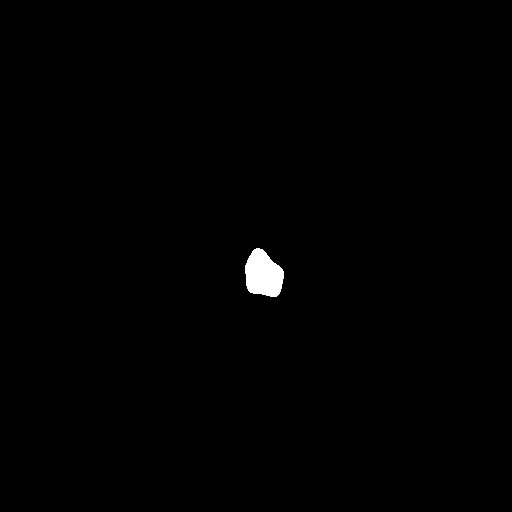

In [ ]:
im = Image.open('/content/drive/MyDrive/DL/images/gt/train/021_033.jpg')
#plt.imshow(im)
mask = cv2.imread('/content/drive/MyDrive/DL/images/gt/train/021_033.jpg',2)
ret,mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)
print(len(mask))
print(np.unique(mask))
cv2_imshow(mask)

## Defining dataloaders

In [3]:
# # Data augmentation and normalization for training
# # Just normalization for validation
data_dir = '/content/drive/MyDrive/DL/images'

trainDS = ImageDataset(root=data_dir,split='train')
testDS = ImageDataset(root=data_dir,split='test')
print(f"[INFO] found {len(trainDS)} examples in the training set...")
print(f"[INFO] found {len(testDS)} examples in the test set...")

4864
4864
3552
3552
[INFO] found 4864 examples in the training set...
[INFO] found 3552 examples in the test set...


In [4]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.8.2

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

fatal: destination path 'vision' already exists and is not an empty directory.
HEAD is now at 2f40a483d7 [v0.8.X] .circleci: Add Python 3.9 to CI (#3063)


In [5]:
import utils

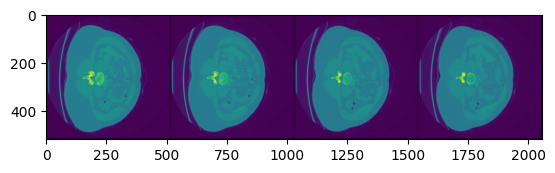

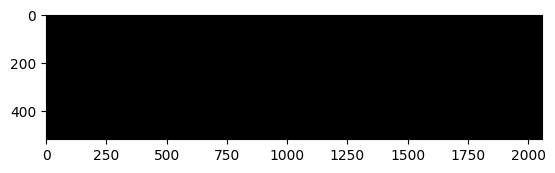

In [6]:
#model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
#dataset = PennFudanDataset('PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    trainDS, batch_size=4, shuffle=False, num_workers=2,
    collate_fn=utils.collate_fn
    )

thing = iter(data_loader)
images,targets = next(thing)

#print('TESTTTT',len(images))

out = torchvision.utils.make_grid(list(images))
out = out.numpy().transpose((1,2,0))
plt.imshow(out)
plt.show()

masks = [t['masks'] for t in targets]
shapes = [t['masks'].shape for t in targets]
#ids = [t['image_id'] for t in targets]
out = torchvision.utils.make_grid(masks)
out = out.numpy().transpose((1,2,0))
plt.imshow(out)
plt.show()

In [7]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

      
def get_instance_segmentation_model(num_classes, pretrained):
    # load an instance segmentation model pre-trained on COCO
    if pretrained:
      model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=pretrained)
    else:
      model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=pretrained,
                                                         num_classes=num_classes)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    print('in features:',in_features)
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    print('mask in features',in_features_mask)
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)
    return model

4992/32=156 obj in trainloader

3552/32=111 obj in testloader

In [8]:
# create the training and test data loaders
trainLoader = torch.utils.data.DataLoader(
    trainDS, batch_size=32, shuffle=False, num_workers=6,
    collate_fn=utils.collate_fn
    )
testLoader = torch.utils.data.DataLoader(
    testDS, batch_size=16, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn
    )

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [9]:
from engine import train_one_epoch, evaluate

## Training


In [ ]:
# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
#model = build_model(num_classes)
# move model to the right device
model = get_instance_segmentation_model(num_classes = 2, pretrained = False) #MODEL WILL NOT BE PRETRAINED
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

In [ ]:
# let's train it for 10 epochs
from torch.optim.lr_scheduler import StepLR
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 batches
    train_one_epoch(model, optimizer, trainLoader, device, epoch, print_freq=12)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    #evaluate(model, testLoader, device=device)

Epoch: [0]  [  0/152]  eta: 0:06:27  lr: 0.000038  loss: 3.3388 (3.3388)  loss_classifier: 0.6580 (0.6580)  loss_box_reg: 0.0001 (0.0001)  loss_mask: 1.9323 (1.9323)  loss_objectness: 0.6895 (0.6895)  loss_rpn_box_reg: 0.0589 (0.0589)  time: 2.5519  data: 1.3289  max mem: 31267
Epoch: [0]  [ 12/152]  eta: 0:02:39  lr: 0.000435  loss: 2.2063 (2.2435)  loss_classifier: 0.6063 (0.5827)  loss_box_reg: 0.0001 (0.0021)  loss_mask: 0.9658 (0.9111)  loss_objectness: 0.6878 (0.6871)  loss_rpn_box_reg: 0.0586 (0.0605)  time: 1.1415  data: 0.1575  max mem: 31267
Epoch: [0]  [ 24/152]  eta: 0:02:18  lr: 0.000832  loss: 1.6110 (1.9238)  loss_classifier: 0.4351 (0.4692)  loss_box_reg: 0.0001 (0.0029)  loss_mask: 0.3763 (0.7185)  loss_objectness: 0.6766 (0.6754)  loss_rpn_box_reg: 0.0568 (0.0578)  time: 1.0137  data: 0.0573  max mem: 31267
Epoch: [0]  [ 36/152]  eta: 0:02:07  lr: 0.001229  loss: 1.0579 (1.5941)  loss_classifier: 0.1521 (0.3494)  loss_box_reg: 0.0178 (0.0176)  loss_mask: 0.2513 (0.566

In [ ]:
#torch.save(model,'/content/drive/MyDrive/DL/not_pretrained.pth')

## Post-processing

In [10]:
complete_model = torch.load('/content/drive/MyDrive/DL/not_pretrained.pth')

In [ ]:
ims,tar = next(iter(testLoader))
images = list(img.to(device) for img in ims)
#model = get_instance_segmentation_model(pretrained = True, num_classes = 2)
complete_model.to(device)
complete_model.eval()
outputs = complete_model(images)

outputs = [{k: v.cpu().detach().numpy() for k, v in t.items()} for t in outputs]

In [ ]:
pred = np.asarray([out['masks'] for out in outputs])
[len(p) for p in pred]

<ipython-input-163-ad437b8d3543>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pred = np.asarray([out['masks'] for out in outputs])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3]

In [ ]:
normalized_masks = []
for m in pred:
  normalized_masks.append(np.average(m,axis=0))
normalized_masks = np.asarray(normalized_masks)
normalized_masks.shape
#out = [batch_size, im_depth, h, w]

(16, 1, 512, 512)

In [ ]:
# out = torchvision.utils.make_grid(torch.from_numpy(normalized_masks))
# out = out.numpy().transpose((1,2,0))
# plt.imshow(out)
# plt.show()

In [ ]:
scaled = normalized_masks*255
binary = []
for s in scaled:
  ret,mask = cv2.threshold(s,127,255,cv2.THRESH_BINARY)
  #print(len(mask[np.where(mask==255)]))
  if(len(mask[np.where(mask==255)])>200000): #262k pixels in image, if over 200k are labeled white, then definitely wrong
    mask*=0
  binary.append(mask)
binary = np.asarray(binary)/255
binary.shape

(16, 1, 512, 512)

In [ ]:
#[np.unique(t['masks']) for t in tar]

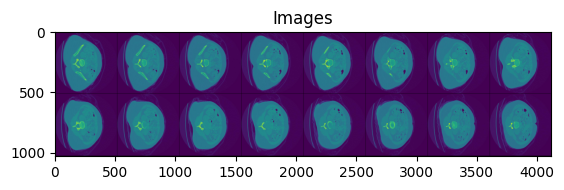

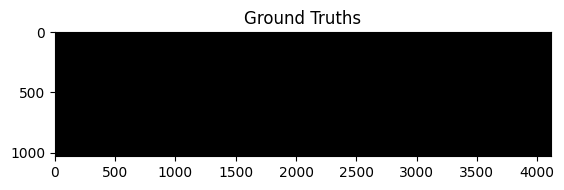

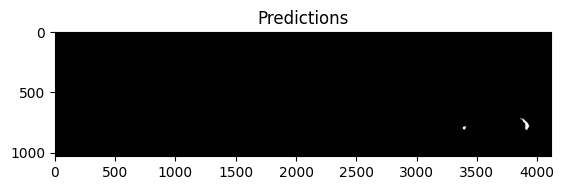

In [ ]:
out = torchvision.utils.make_grid(list(ims)) #images
out = out.numpy().transpose((1,2,0))
plt.imshow(out)
plt.title('Images')
plt.show()

gt = [t['masks'] for t in tar]
out = torchvision.utils.make_grid(gt) #ground truths
out = out.numpy().transpose((1,2,0))
plt.imshow(out)
plt.title('Ground Truths')
plt.show()

out = torchvision.utils.make_grid(torch.from_numpy(binary)) #preds
out = out.numpy().transpose((1,2,0))
plt.imshow(out)
plt.title('Predictions')
plt.show()

In [15]:
thing = [1,np.nan,2]
np.nanmean(thing)

1.5

In [16]:
def model_eval(model,test): #model and testLoader
  model.to(device)
  model.eval()
  total = 512**2
  #print('Total:', total)

  accs = []
  precs = []
  recalls = []
  fnrs = []
  num_batches = len(test)
  i = 0
  metrics = dict()

  for batch_ims, batch_tar in test:
    if i % 5 == 0:
      print(f'Batch number {i} of {num_batches}...')

    #eval model on batch and get outputs
    images = list(img.to(device) for img in batch_ims)
    outputs = model(images)
    outputs = [{k: v.cpu().detach().numpy() for k, v in t.items()} for t in outputs]
    gt = [tar['masks'] for tar in batch_tar]

    for out,t in zip(outputs,gt):

      #evaluate model, get output, and process to return actual masks
      p = np.average(out['masks'],axis=0)*255
      ret,p = cv2.threshold(p,127,255,cv2.THRESH_BINARY)
      if(len(p[np.where(p==255)])>200000): #262k pixels in image, if over 200k are labeled white, then definitely wrong
        p*=0
      else:
        p /= 255
      p=p.astype('uint8')

      t=t.numpy()

      tp = np.logical_and(p,t).astype('uint8').sum()
      tn = np.logical_not(np.logical_or(p,t)).astype('uint8').sum()
      fp = np.logical_and(p,np.logical_not(t)).astype('uint8').sum()
      fn = np.logical_and(np.logical_not(p),t).astype('uint8').sum()

      precs.append(tp/(tp+fp))
      recalls.append(tp/(tp+fn))
      accs.append((tp+tn)/total)
      fnrs.append(fn/(fn+tp))
    if i % 5 == 0:
      print(f'Finished with batch {i}...')
    i+=1

  #accs = np.asarray(accs)
  #precs = np.asarray(precs)
  #recalls = np.asarray(recalls)
  #fnrs = np.asarray(fnrs)

  metrics['Acc'] = np.nanmean(accs)
  metrics['Prec'] = np.nanmean(precs)
  metrics['Rec'] = np.nanmean(recalls)
  metrics['FNR'] = np.nanmean(fnrs)
  return metrics

In [17]:
metrics = model_eval(complete_model,testLoader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Batch number 0 of 222...


<ipython-input-16-2b250a5947a5>:43: RuntimeWarning: invalid value encountered in ulong_scalars
  precs.append(tp/(tp+fp))
<ipython-input-16-2b250a5947a5>:44: RuntimeWarning: invalid value encountered in ulong_scalars
  recalls.append(tp/(tp+fn))
<ipython-input-16-2b250a5947a5>:46: RuntimeWarning: invalid value encountered in ulong_scalars
  fnrs.append(fn/(fn+tp))


Finished with batch 0...
Batch number 5 of 222...
Finished with batch 5...
Batch number 10 of 222...
Finished with batch 10...
Batch number 15 of 222...
Finished with batch 15...
Batch number 20 of 222...
Finished with batch 20...
Batch number 25 of 222...
Finished with batch 25...
Batch number 30 of 222...
Finished with batch 30...
Batch number 35 of 222...
Finished with batch 35...
Batch number 40 of 222...
Finished with batch 40...
Batch number 45 of 222...
Finished with batch 45...
Batch number 50 of 222...
Finished with batch 50...
Batch number 55 of 222...
Finished with batch 55...
Batch number 60 of 222...
Finished with batch 60...
Batch number 65 of 222...
Finished with batch 65...
Batch number 70 of 222...
Finished with batch 70...
Batch number 75 of 222...
Finished with batch 75...
Batch number 80 of 222...
Finished with batch 80...
Batch number 85 of 222...
Finished with batch 85...
Batch number 90 of 222...
Finished with batch 90...
Batch number 95 of 222...
Finished with b

In [18]:
metrics #from model trained from scratch

{'Acc': 0.9931655370437347,
 'Prec': 0.2660114573258912,
 'Rec': 0.17371490399651907,
 'FNR': 0.8262850960034809}

In [19]:
pretrained_model = torch.load('/content/drive/MyDrive/DL/resnet_pretrained.pth')

In [20]:
pretrained_metrics = model_eval(pretrained_model,testLoader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Batch number 0 of 222...


<ipython-input-16-2b250a5947a5>:43: RuntimeWarning: invalid value encountered in ulong_scalars
  precs.append(tp/(tp+fp))
<ipython-input-16-2b250a5947a5>:44: RuntimeWarning: invalid value encountered in ulong_scalars
  recalls.append(tp/(tp+fn))
<ipython-input-16-2b250a5947a5>:46: RuntimeWarning: invalid value encountered in ulong_scalars
  fnrs.append(fn/(fn+tp))


Finished with batch 0...
Batch number 5 of 222...
Finished with batch 5...
Batch number 10 of 222...
Finished with batch 10...
Batch number 15 of 222...
Finished with batch 15...
Batch number 20 of 222...
Finished with batch 20...
Batch number 25 of 222...
Finished with batch 25...
Batch number 30 of 222...
Finished with batch 30...
Batch number 35 of 222...
Finished with batch 35...
Batch number 40 of 222...
Finished with batch 40...
Batch number 45 of 222...
Finished with batch 45...
Batch number 50 of 222...
Finished with batch 50...
Batch number 55 of 222...
Finished with batch 55...
Batch number 60 of 222...
Finished with batch 60...
Batch number 65 of 222...
Finished with batch 65...
Batch number 70 of 222...
Finished with batch 70...
Batch number 75 of 222...
Finished with batch 75...
Batch number 80 of 222...
Finished with batch 80...
Batch number 85 of 222...
Finished with batch 85...
Batch number 90 of 222...
Finished with batch 90...
Batch number 95 of 222...
Finished with b

In [21]:
pretrained_metrics

{'Acc': 0.9974649768691879,
 'Prec': 0.35937599558026784,
 'Rec': 0.2643639993318454,
 'FNR': 0.7356360006681545}